<a href="https://colab.research.google.com/github/cyrusss7016/Cyrush-Kushwaha/blob/main/Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Why supermarkets are popular nowadays?

Supermarkets have gained popularity due to their convenience, offering a one-stop shopping experience for a wide variety of products. They provide competitive pricing, ensuring affordability, and emphasize quality and freshness, which appeals to health-conscious consumers. Additionally, their accessibility, extended hours, and integration of technology for online shopping and delivery services enhance the overall shopping experience. Community engagement and sustainability initiatives further strengthen customer loyalty, making supermarkets a preferred choice for many shoppers.

Importing Necessary Libraries:

First of all, I will import all the necessary libraries that we will use throughout the project. This generally includes libraries for data manipulation, data visualization, and others based on the specific needs of the project.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import scipy as sp
import warnings
import datetime
warnings.filterwarnings("ignore")
%matplotlib inline

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

Next, I will load the dataset into a pandas DataFrame which will facilitate easy manipulation and analysis:

In [ ]:
df = pd.read_csv("/Test-Set.csv")

Why supermarkets are popular nowadays?

Supermarkets are popular today due to their convenience, offering a wide range of products under one roof. They provide competitive pricing and frequent promotions, making shopping more affordable. The emphasis on quality and freshness, especially in produce and meats, attracts health-conscious consumers. Additionally, supermarkets often integrate technology, enabling online shopping and home delivery, which fits busy lifestyles. Their accessibility, extended hours, and community engagement further enhance their appeal, making them a go-to choice for many shoppers.

In [ ]:
df.head()

,ProductID,Weight,FatContent,ProductVisibility,ProductType,MRP,OutletID,EstablishmentYear,OutletSize,LocationType,OutletType
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


Initial Data Analysis:

First I will perform a preliminary analysis to understand the structure and types of data columns:



In [ ]:
df.shape

(5681, 11)

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ProductID          5681 non-null   object 
 1   Weight             4705 non-null   float64
 2   FatContent         5681 non-null   object 
 3   ProductVisibility  5681 non-null   float64
 4   ProductType        5681 non-null   object 
 5   MRP                5681 non-null   float64
 6   OutletID           5681 non-null   object 
 7   EstablishmentYear  5681 non-null   int64  
 8   OutletSize         4075 non-null   object 
 9   LocationType       5681 non-null   object 
 10  OutletType         5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


In [ ]:
df.describe()

,Weight,ProductVisibility,MRP,EstablishmentYear
count,4705.000000,5681.000000,5681.000000,5681.000000
mean,12.695633,0.065684,141.023273,1997.828903
std,4.664849,0.051252,61.809091,8.372256
min,4.555000,0.000000,31.990000,1985.000000
25%,8.645000,0.027047,94.412000,1987.000000
50%,12.500000,0.054154,141.415400,1999.000000
75%,16.700000,0.093463,186.026600,2004.000000
max,21.350000,0.323637,266.588400,2009.000000


In [ ]:
df['ProductID'].nunique()


1543

In [ ]:
df['ProductID'].value_counts()


,count
ProductID,
FDQ60,8
NCS41,8
FDW10,8
DRF48,8
FDN52,8
...,...
NCM07,1
FDT40,1
NCI29,1


In [ ]:
df['Weight'].value_counts()


,count
Weight,
10.50,57
17.60,53
15.60,48
20.25,47
19.35,46
...,...
5.15,1
6.96,1
8.38,1


In [ ]:
df['FatContent'].value_counts()


,count
FatContent,
Low Fat,3396
Regular,1935
LF,206
reg,78
low fat,66


In [ ]:
df['ProductVisibility'].value_counts()


,count
ProductVisibility,
0.000000,353
0.046596,2
0.080226,2
0.072139,2
0.097062,2
...,...
0.155144,1
0.069557,1
0.012613,1


In [ ]:
df['ProductType'].value_counts()


,count
ProductType,
Snack Foods,789
Fruits and Vegetables,781
Household,638
Frozen Foods,570
Dairy,454
Baking Goods,438
Canned,435
Health and Hygiene,338
Meat,311


In [ ]:
df['MRP'].value_counts()


,count
MRP,
57.0614,5
60.5194,4
141.2154,4
186.8898,4
36.4874,4
...,...
42.6086,1
105.9964,1
52.7956,1


In [ ]:
df['OutletID'].value_counts()


,count
OutletID,
OUT027,624
OUT013,621
OUT035,620
OUT049,620
OUT046,620
OUT045,619
OUT018,618
OUT017,617
OUT010,370


In [ ]:
df['EstablishmentYear'].value_counts()


,count
EstablishmentYear,
1985,976
1987,621
1999,620
2004,620
1997,620
2002,619
2009,618
2007,617
1998,370


In [ ]:
df['OutletSize'].value_counts()


,count
OutletSize,
Medium,1862
Small,1592
High,621


In [ ]:
df['LocationType'].value_counts()


,count
LocationType,
Tier 3,2233
Tier 2,1856
Tier 1,1592


In [ ]:
df['OutletType'].value_counts()


,count
OutletType,
Supermarket Type1,3717
Grocery Store,722
Supermarket Type3,624
Supermarket Type2,618


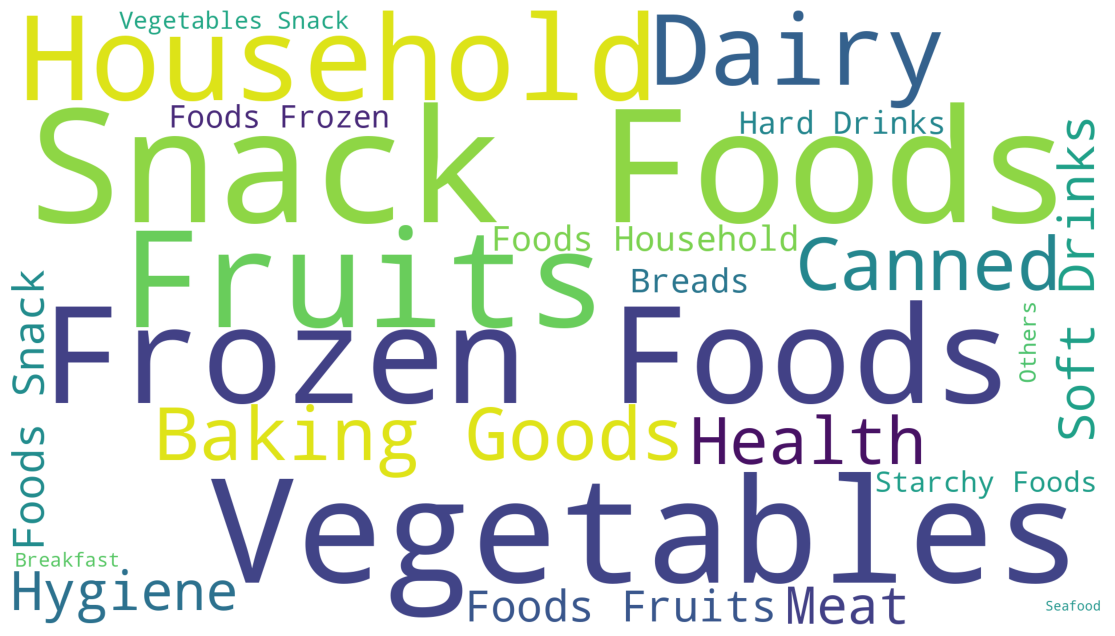

In [ ]:
from wordcloud import WordCloud
plt.subplots(figsize=(20,8))
wordcloud = WordCloud(background_color='White',width=1920,height=1080).generate(" ".join(df['ProductType']))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('cast.png')
plt.show()

Checking if there are any missing values.

In [ ]:
df.isnull().sum()


,0
ProductID,0
Weight,976
FatContent,0
ProductVisibility,0
ProductType,0
MRP,0
OutletID,0
EstablishmentYear,0
OutletSize,1606
LocationType,0


Exploratory Data Analysis (EDA) :

Exploratory Data Analysis (EDA) is an essential step in the data analysis process that involves examining datasets to summarize their main characteristics, often using visual methods. EDA helps identify patterns, trends, and anomalies, allowing analysts to gain insights and formulate hypotheses. Techniques such as descriptive statistics, data visualization (like histograms, scatter plots, and box plots), and correlation analysis are commonly employed. By thoroughly understanding the data's structure and distribution, EDA aids in guiding further analysis, feature selection, and model building, ultimately leading to more informed decision-making.



SCATTER PLOT:

A scatter plot is a type of data visualization that displays values for two variables as points on a Cartesian coordinate system. Each point represents an observation in the dataset, with one variable plotted along the x-axis and the other along the y-axis. Scatter plots are useful for identifying relationships or correlations between the two variables, such as positive, negative, or no correlation. They can also reveal trends, clusters, and outliers within the data. By visually analyzing the distribution and patterns of the points, researchers can gain insights into the potential interactions between the variables being studied.

<Axes: xlabel='ProductID', ylabel='Weight'>

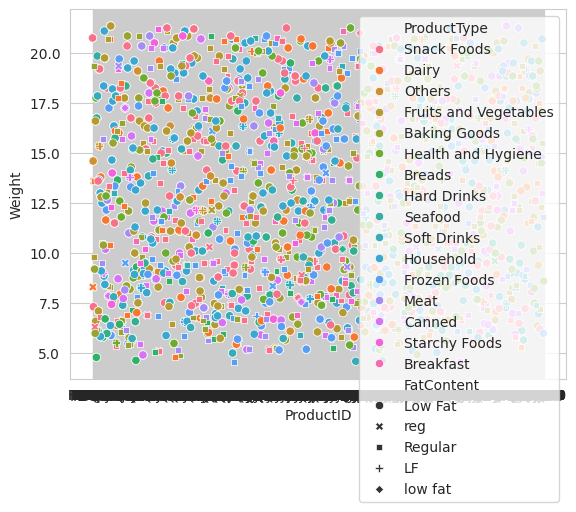

In [ ]:
sns.scatterplot(data=df, x='ProductID', y='Weight',hue='ProductType',style='FatContent')


BOXPLOT :

A boxplot is a standardized way of displaying the distribution of data based on a five number summary (“minimum”, first quartile (Q1), median, third quartile (Q3), and “maximum”). ... It can also tell you if your data is symmetrical, how tightly your data is grouped, and if and how your data is skewed.

<Axes: xlabel='OutletType'>

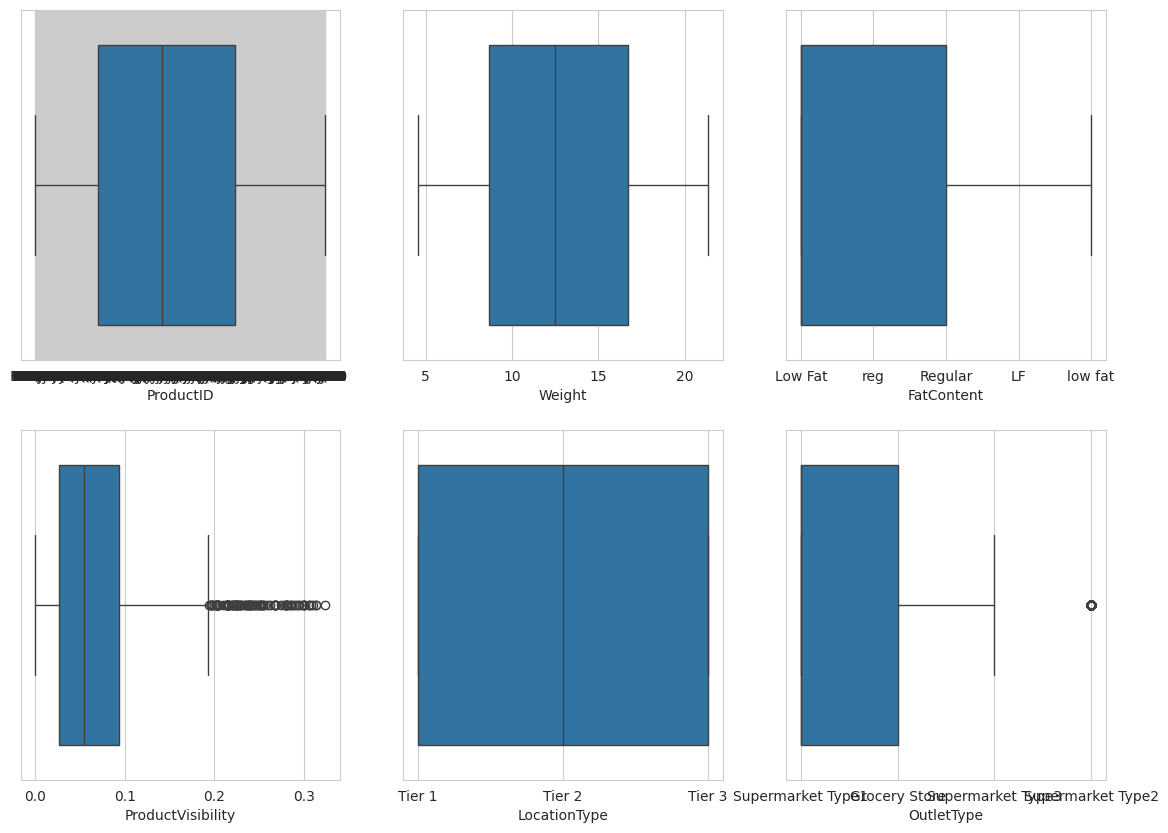

In [ ]:
plt.figure(figsize=(14,10))
sns.set_style(style='whitegrid')
plt.subplot(2,3,1)
sns.boxplot(x='ProductID',data=df)
plt.subplot(2,3,2)
sns.boxplot(x='Weight',data=df)
plt.subplot(2,3,3)
sns.boxplot(x='FatContent',data=df)
plt.subplot(2,3,4)
sns.boxplot(x='ProductVisibility',data=df)
plt.subplot(2,3,5)
sns.boxplot(x='LocationType',data=df)
plt.subplot(2,3,6)
sns.boxplot(x='OutletType',data=df)

KDEPLOT :

kdeplot is a data visualization technique that employs Kernel Density Estimation (KDE) to estimate and display the probability density function of continuous data. It produces a smoothed, continuous curve that reveals the underlying distribution's shape and characteristics. This method is particularly useful for exploring data patterns, identifying peaks, and visualizing the density of both univariate and bivariate data. kdeplot offers a complementary perspective to histograms and aids in understanding the distribution of data in a more detailed and visually appealing manner.

<Axes: xlabel='FatContent', ylabel='Count'>

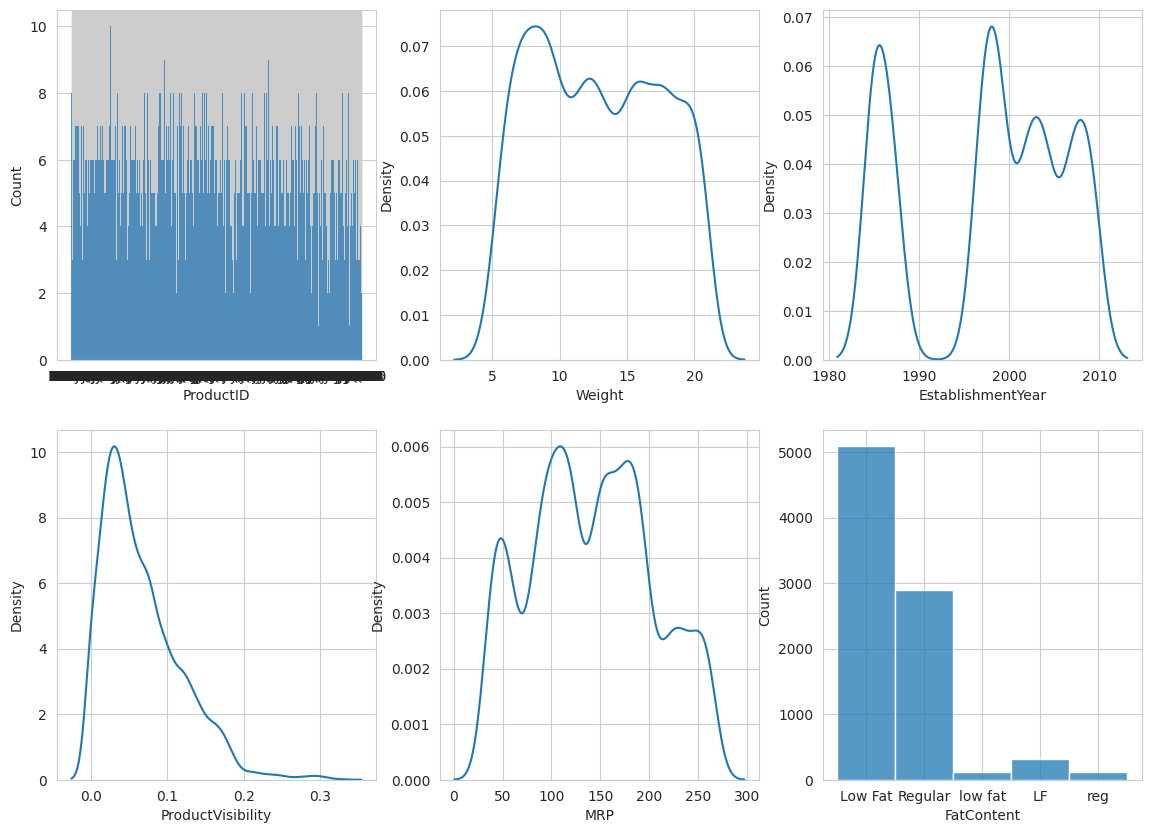

In [ ]:
plt.figure(figsize=(14,10))
sns.set_style(style='whitegrid')
plt.subplot(2,3,1)
sns.histplot(x='ProductID',data=df)
plt.subplot(2,3,2)
sns.kdeplot(x='Weight',data=df)
plt.subplot(2,3,3)
sns.kdeplot(x='EstablishmentYear',data=df)
plt.subplot(2,3,4)
sns.kdeplot(x='ProductVisibility',data=df)
plt.subplot(2,3,5)
sns.kdeplot(x='MRP',data=df)
plt.subplot(2,3,6)
sns.histplot(x='FatContent',data=df)

PAIRPLOT :

A pairplot plot a pairwise relationships in a dataset. The pairplot function creates a grid of Axes such that each variable in data will by shared in the y-axis across a single row and in the x-axis across a single column.

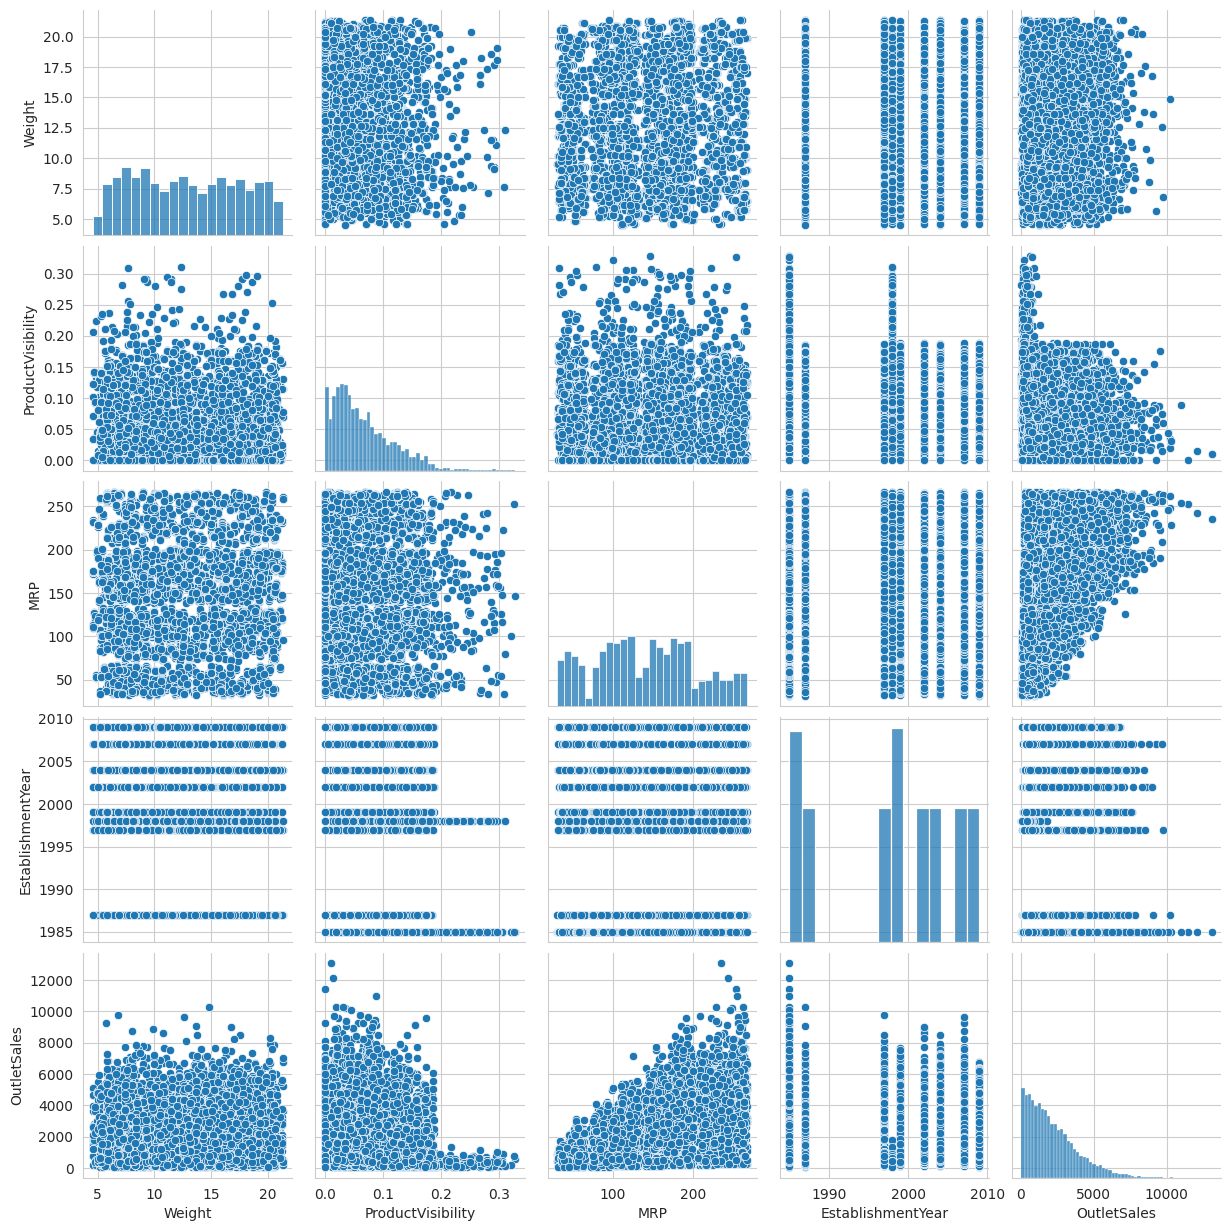

In [ ]:
sns.pairplot(data=df)

BARPLOT :

A barplot (or barchart) is one of the most common types of graphic. It shows the relationship between a numeric and a categoric variable. Each entity of the categoric variable is represented as a bar. The size of the bar represents its numeric value.

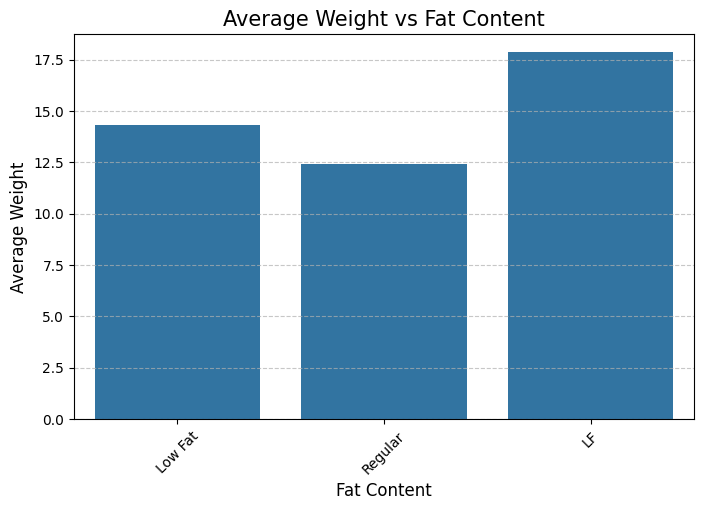

In [ ]:
plt.style.use("default")
plt.figure(figsize=(8,5))

df_filtered = df[170:180].dropna(subset=["Weight"])

sns.barplot(x="FatContent", y="Weight", data=df_filtered, estimator=lambda x: x.mean(), ci=None)

plt.title("Average Weight vs Fat Content", fontsize=15)
plt.xlabel("Fat Content", fontsize=12)
plt.ylabel("Average Weight", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle="--", alpha=0.7)
plt.show()

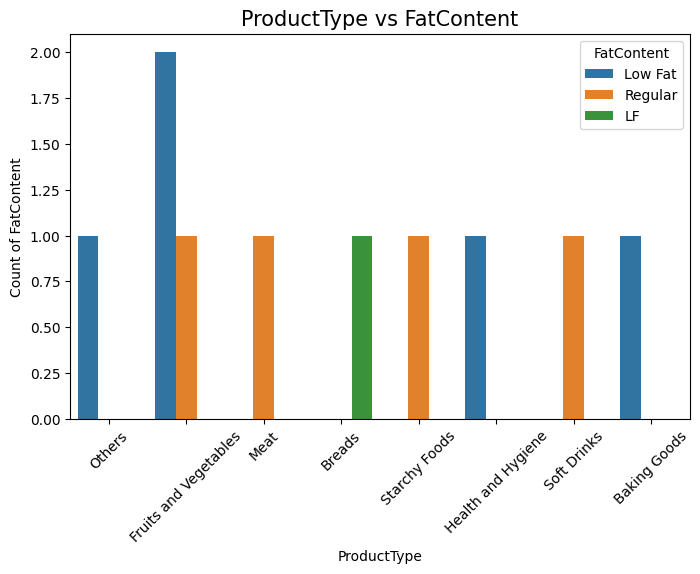

In [ ]:
plt.style.use("default")
plt.figure(figsize=(8,5))

sns.countplot(x="ProductType", hue="FatContent", data=df[170:180])
plt.title("ProductType vs FatContent", fontsize=15)
plt.xlabel("ProductType")
plt.ylabel("Count of FatContent")
plt.xticks(rotation=45)
plt.legend(title="FatContent")
plt.show()

Correlation :

Now, when we train any algorithm, the number of features and their correlation plays an important role. If there are features and many of the features are highly correlated, then training an algorithm with all the featues will reduce the accuracy. Thus features selection should be done carefully. This dataset has less featues but still we will see the correlation.

In [ ]:
numeric_df = df.select_dtypes(include=np.number)

correlation_matrix = numeric_df.corr()

print(correlation_matrix)

                     Weight  ProductVisibility       MRP  EstablishmentYear  \
Weight             1.000000          -0.014048  0.027141          -0.011588   
ProductVisibility -0.014048           1.000000 -0.001315          -0.074834   
MRP                0.027141          -0.001315  1.000000           0.005020   
EstablishmentYear -0.011588          -0.074834  0.005020           1.000000   
OutletSales        0.014123          -0.128625  0.567574          -0.049135   

                   OutletSales  
Weight                0.014123  
ProductVisibility    -0.128625  
MRP                   0.567574  
EstablishmentYear    -0.049135  
OutletSales           1.000000  


<Axes: >

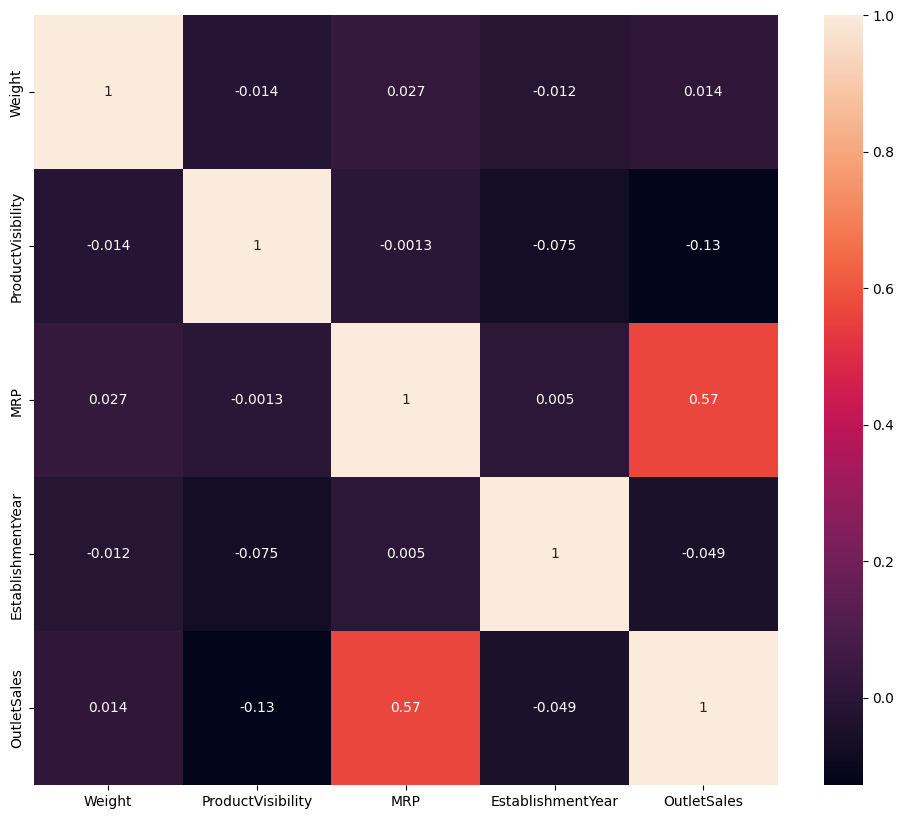

In [ ]:
plt.figure(figsize = (12,10))

numeric_df = df.select_dtypes(include=np.number)
sns.heatmap(numeric_df.corr(), annot =True)

In [ ]:
list_1=list(df.columns)

In [ ]:
list_cate=[]
for i in list_1:
    if df[i].dtype=='object':
        list_cate.append(i)

Label Encoding :    

RED - 0

GREEN - 1

BLUE - 2

In [ ]:
le=LabelEncoder()

In [ ]:
for i in list_cate:
    df[i]=le.fit_transform(df[i])

In [ ]:
df

,ProductID,Weight,FatContent,ProductVisibility,ProductType,MRP,OutletID,EstablishmentYear,OutletSize,LocationType,OutletType,OutletSales
0,156,9.300,1,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.920,2,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,662,17.500,1,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,1121,19.200,2,0.000000,6,182.0950,0,1998,3,2,0,732.3800
4,1297,8.930,1,0.000000,9,53.8614,1,1987,0,2,1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,370,6.865,1,0.056783,13,214.5218,1,1987,0,2,1,2778.3834
8519,897,8.380,2,0.046982,0,108.1570,7,2002,3,1,1,549.2850
8520,1357,10.600,1,0.035186,8,85.1224,6,2004,2,1,1,1193.1136
8521,681,7.210,2,0.145221,13,103.1332,3,2009,1,2,2,1845.5976


Splitting The Data into Training And Testing Dataset.

In [ ]:
y=df['ProductType']
x=df.drop('ProductType',axis=1)

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0,test_size=0.2)


Building Machine Learning Models

1. K Nearest Neighbor :

K-Nearest Neighbour is one of the simplest Machine Learning algorithms based on Supervised Learning technique.

K-NN algorithm assumes the similarity between the new case/data and available cases and put the new case into the category that is most similar to the available categories.

K-NN algorithm stores all the available data and classifies a new data point based on the similarity. This means when new data appears then it can be easily classified into a well suite category by using K- NN algorithm.

In [ ]:
x = df.drop('ProductType', axis=1)
y = df['ProductType']

x = x.dropna()
y = y[x.index]

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0, test_size=0.2)

knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [ ]:
y_pred=knn.predict(x_test)
print("Classification Report is:\n",classification_report(y_test,y_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
print("Training Score:\n",knn.score(x_train,y_train)*100)

Classification Report is:
               precision    recall  f1-score   support

           0       0.12      0.17      0.14       108
           1       0.13      0.14      0.13        43
           2       0.25      0.07      0.11        15
           3       0.14      0.16      0.15       116
           4       0.19      0.20      0.19       107
           5       0.18      0.18      0.18       153
           6       0.29      0.29      0.29       229
           7       0.44      0.50      0.47        34
           8       0.43      0.36      0.39        97
           9       0.55      0.72      0.62       138
          10       0.11      0.05      0.07        60
          11       0.25      0.12      0.16        25
          12       0.00      0.00      0.00         8
          13       0.21      0.20      0.20       182
          14       0.65      0.62      0.64        69
          15       0.00      0.00      0.00        28

    accuracy                           0.28      1412

2. Decision Tree :


A decision tree is a flowchart-like structure in which each internal node represents a test on a feature (e.g. whether a coin flip comes up heads or tails) , each leaf node represents a class label (decision taken after computing all features) and branches represent conjunctions of features that lead to those class labels. The paths from root to leaf represent classification rules.

In [ ]:
dtree = DecisionTreeClassifier(max_depth=6, random_state=123,criterion='entropy')
dtree.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=6, random_state=123)

In [ ]:
y_pred=dtree.predict(x_test)
print("Classification Report is:\n",classification_report(y_test,y_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
print("Training Score:\n",dtree.score(x_train,y_train)*100)

Classification Report is:
               precision    recall  f1-score   support

           0       0.28      0.05      0.08       108
           1       0.00      0.00      0.00        43
           2       0.00      0.00      0.00        15
           3       0.22      0.18      0.20       116
           4       0.30      0.21      0.24       107
           5       0.33      0.11      0.17       153
           6       0.23      0.47      0.31       229
           7       0.69      0.59      0.63        34
           8       0.86      0.45      0.59        97
           9       0.71      0.85      0.77       138
          10       0.00      0.00      0.00        60
          11       0.36      0.64      0.46        25
          12       0.00      0.00      0.00         8
          13       0.27      0.48      0.34       182
          14       0.75      0.86      0.80        69
          15       0.00      0.00      0.00        28

    accuracy                           0.37      1412

3. Random Forest :


Random forest, like its name implies, consists of a large number of individual decision trees that operate as an ensemble. Each individual tree in the random forest spits out a class prediction and the class with the most votes becomes our model’s prediction.

A large number of relatively uncorrelated models (trees) operating as a committee will outperform any of the individual constituent models.

In [ ]:
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)

RandomForestClassifier()

In [ ]:
y_pred=rfc.predict(x_test)
print("Classification Report is:\n",classification_report(y_test,y_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
print("Training Score:\n",rfc.score(x_train,y_train)*100)

Classification Report is:
               precision    recall  f1-score   support

           0       0.73      0.64      0.68       108
           1       0.85      0.65      0.74        43
           2       0.92      0.73      0.81        15
           3       0.80      0.70      0.75       116
           4       0.82      0.64      0.72       107
           5       0.76      0.78      0.77       153
           6       0.73      0.80      0.77       229
           7       1.00      0.85      0.92        34
           8       0.82      0.74      0.78        97
           9       0.82      0.93      0.87       138
          10       0.77      0.57      0.65        60
          11       1.00      0.60      0.75        25
          12       1.00      0.88      0.93         8
          13       0.64      0.87      0.74       182
          14       0.87      0.99      0.93        69
          15       0.93      0.46      0.62        28

    accuracy                           0.77      1412

4. Gradient Boosting Classifier :


The GradientBoostingClassifier is a machine learning model designed for classification tasks. It utilizes gradient boosting, an ensemble technique, to combine the predictions of multiple weak classifiers sequentially. With features like weighted voting, adjustable learning rates, and regularization parameters, it provides robust and accurate solutions for a wide range of classification problems. It is particularly useful when dealing with complex datasets and has applications in spam detection, fraud prevention, and image classification, among others.

In [ ]:
gbc=GradientBoostingClassifier()
gbc.fit(x_train,y_train)

GradientBoostingClassifier()

In [ ]:
y_pred=gbc.predict(x_test)
print("Classification Report is:\n",classification_report(y_test,y_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
print("Training Score:\n",gbc.score(x_train,y_train)*100)

Classification Report is:
               precision    recall  f1-score   support

           0       0.57      0.38      0.46       108
           1       0.84      0.60      0.70        43
           2       0.87      0.87      0.87        15
           3       0.65      0.40      0.49       116
           4       0.78      0.44      0.56       107
           5       0.62      0.46      0.53       153
           6       0.54      0.69      0.61       229
           7       0.97      0.85      0.91        34
           8       0.82      0.75      0.78        97
           9       0.85      0.93      0.89       138
          10       0.70      0.47      0.56        60
          11       0.81      0.68      0.74        25
          12       1.00      1.00      1.00         8
          13       0.41      0.74      0.53       182
          14       0.88      0.99      0.93        69
          15       0.86      0.64      0.73        28

    accuracy                           0.64      1412

Which is the best Model ?


As we see best Model is given by Random forest classifier(100% Accuracy).

If you've made it this far, I hope you found my analysis enjoyable and informative.

If you have any questions or uncertainties about any part of the notebook, please don't hesitate to leave a comment with your inquiries.

Thank you for your time and attention!